In [2]:
import pandas as pd
import pathlib as path
import matplotlib as plt
import seaborn as sns
path = r'C:\Users\user\Documents\GitHub\Notebooks-on-ml\TITANIC\Data\train.csv'
df = pd.read_csv(path)

train, test = df.drop(columns=['Survived']), df.Survived
print(train.head())

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
def get_family_type(size):
    if size == 1:
        return 'Single'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'
df['FamilyType'] = df['FamilySize'].apply(get_family_type)

df['IsChild'] = df['Age'] < 18
df['IsOld'] = df['Age'] > 60

df['SmallFare'] = df['Fare'] < 10
df['BigFare'] = df['Fare'] > 50

df['Ticket_Group_Size'] = df.groupby('Ticket')['Ticket'].transform('count')
df['Ticket_Group_size'] = df['Ticket_Group_Size'].apply(lambda x: 'Single' if x == 1 else ('Small' if x <=4 else 'Large'))

df['Deck'] = df['Cabin'].str[0].fillna('M')
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


### Quick overview

Shape: (891, 22)

Columns and dtypes:
PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
FamilySize             int64
FamilyType            object
IsChild                 bool
IsOld                   bool
SmallFare               bool
BigFare                 bool
Ticket_Group_Size      int64
Ticket_Group_size     object
Deck                  object
Has_Cabin              int64
dtype: object

Missing values per column:
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarke

### Categorical counts & survival rates

C:\Users\user\AppData\Local\Temp\ipykernel_2888\2158130707.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_2888\2158130707.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_2888\2158130707.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_2888\2158130707.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ci=None)


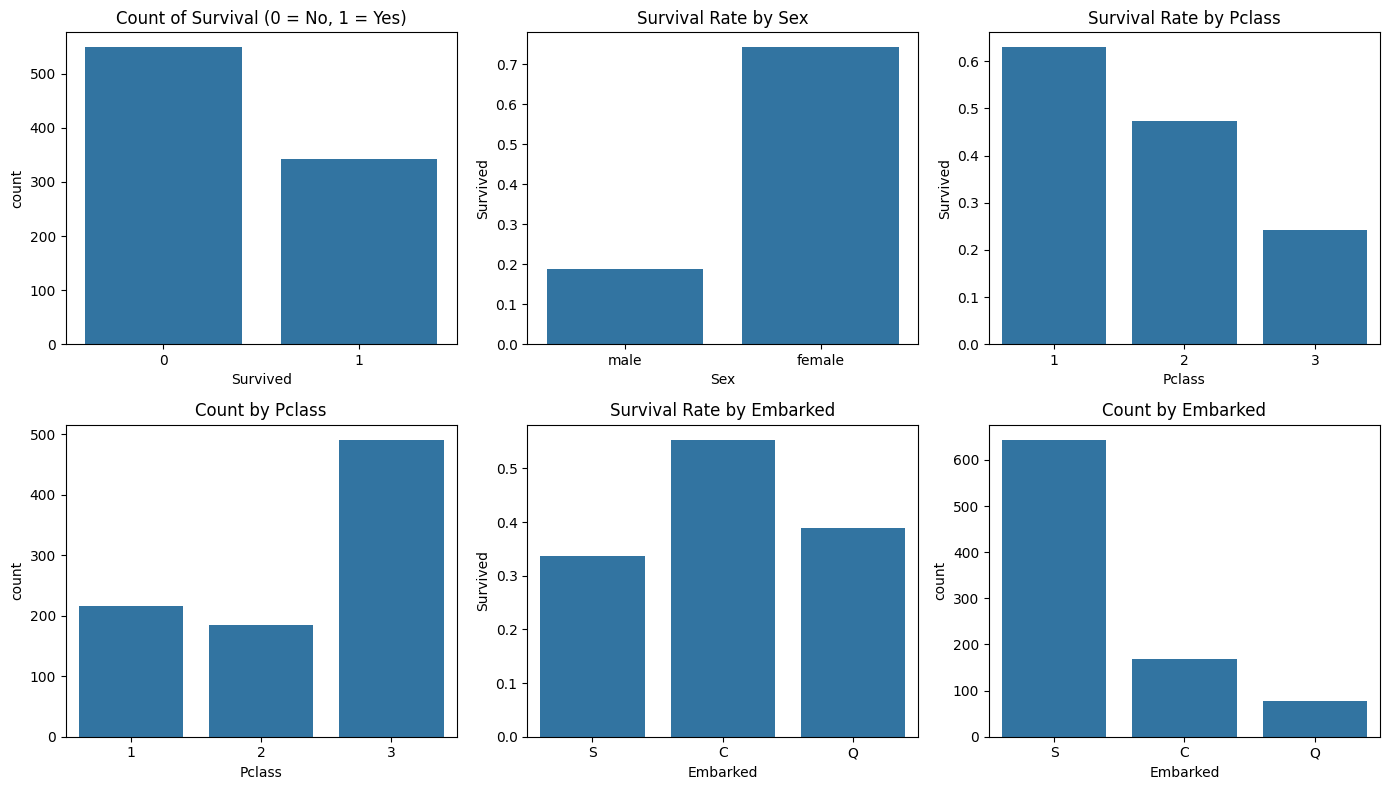

**Interpretation:** Females generally have higher survival; higher classes (1) show higher survival rates. `Embarked` differences may reflect class composition.

### Numeric distributions: Age & Fare

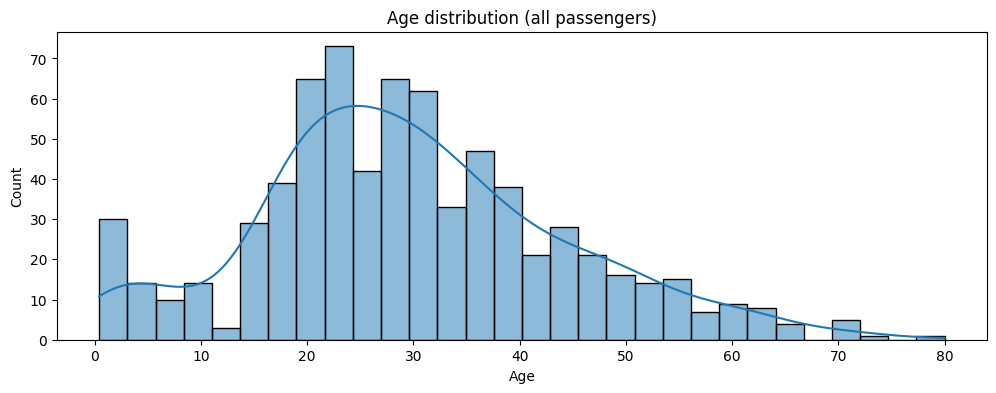

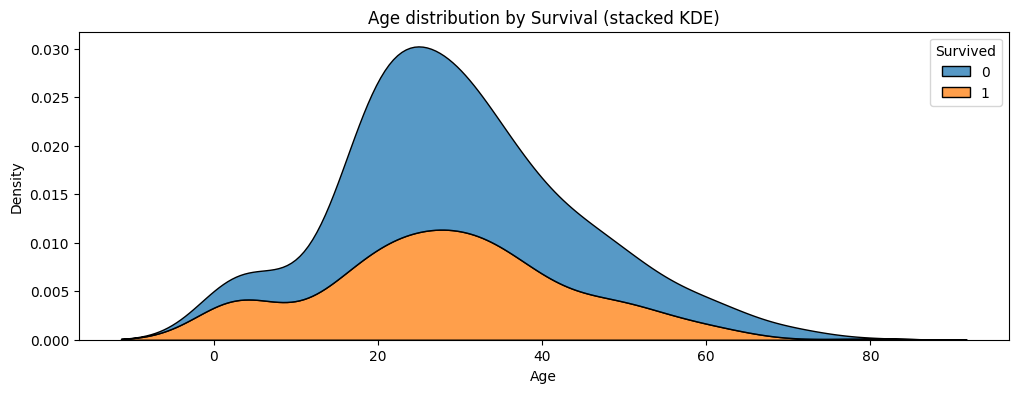

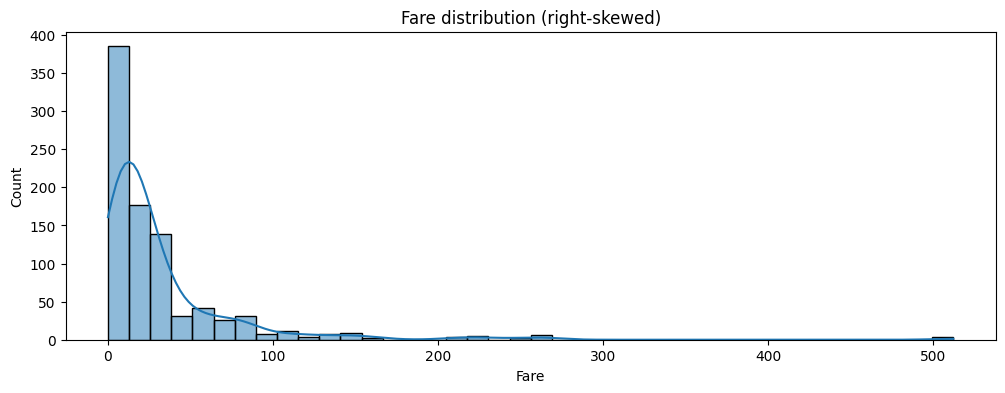

**Notes:** `Age` has missing values; `Fare` is right-skewed (log transform may help).

### Box & Violin comparisons

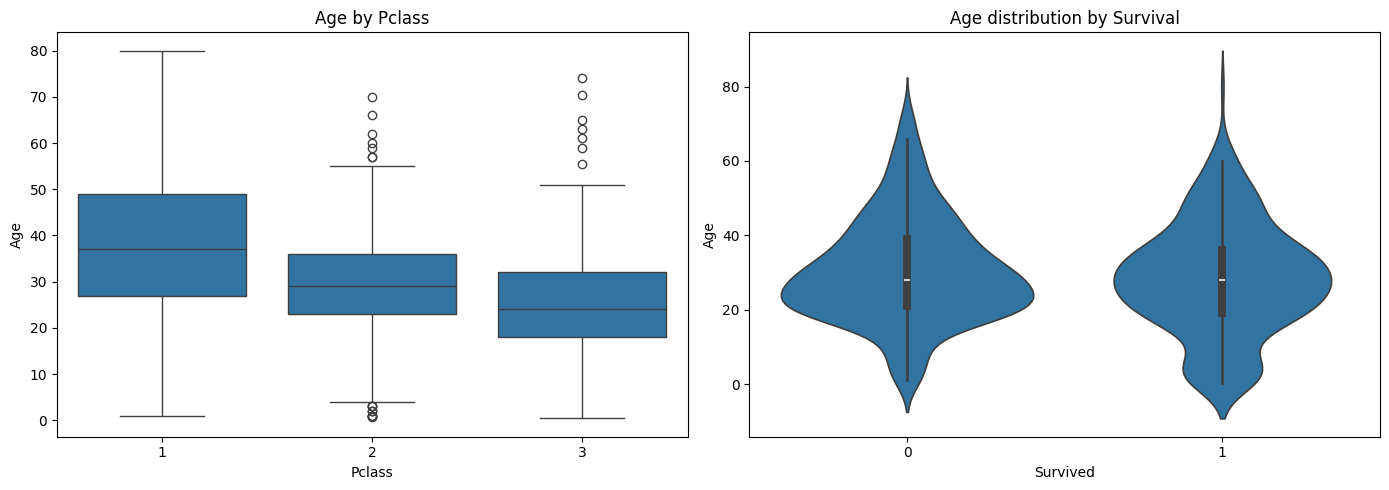

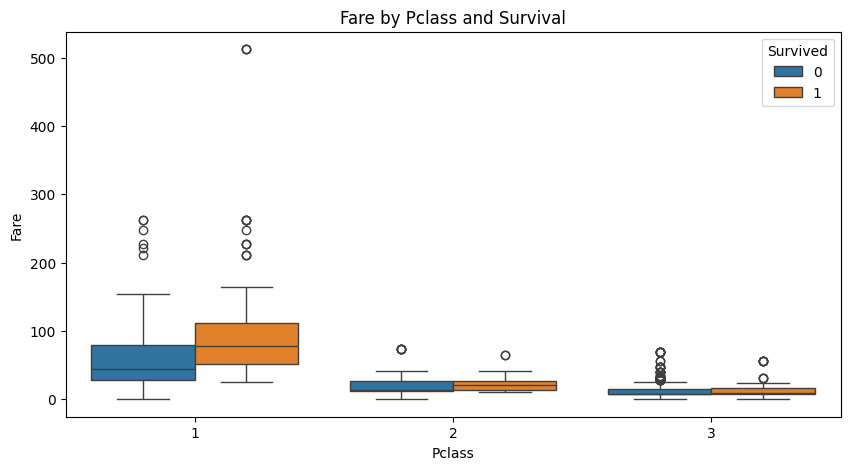

### Correlation & pairwise relationships

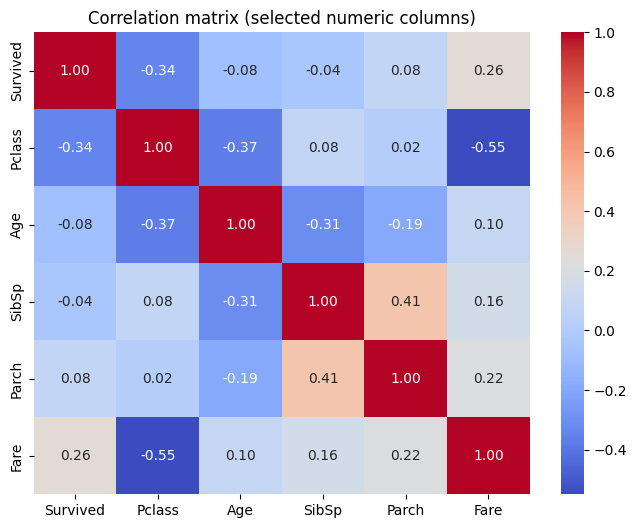

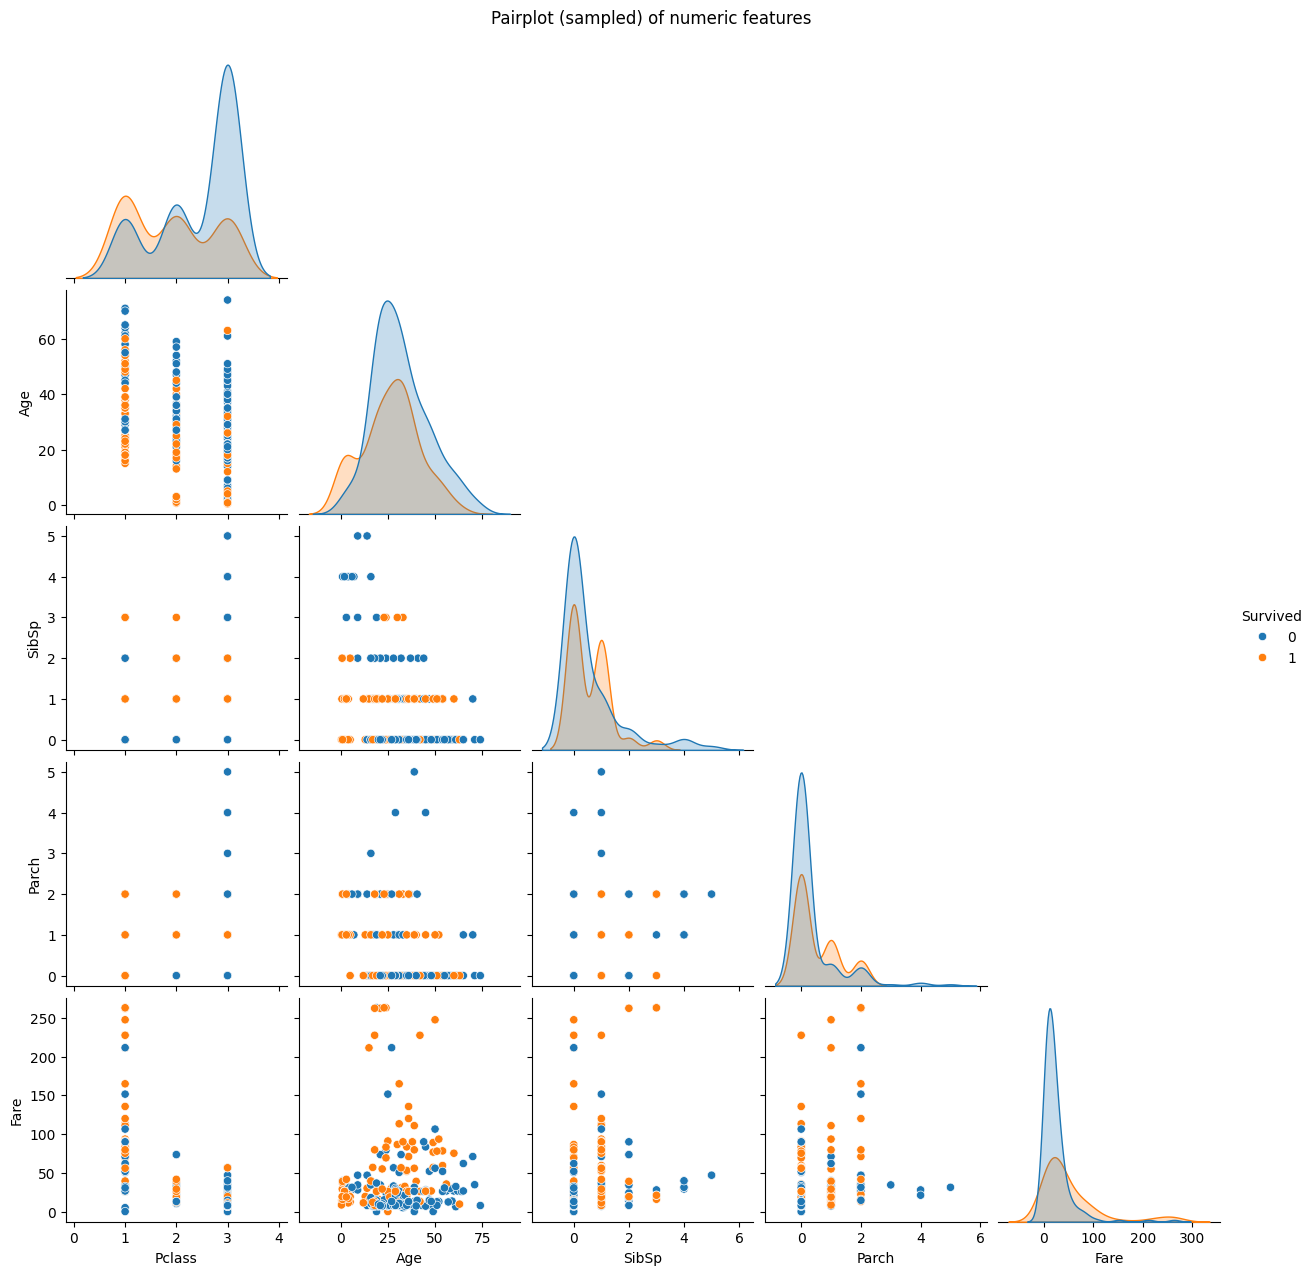

### Missingness and stacked proportions

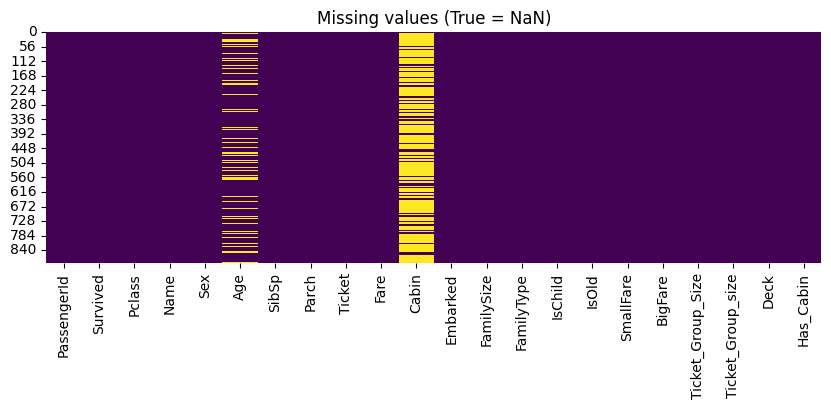

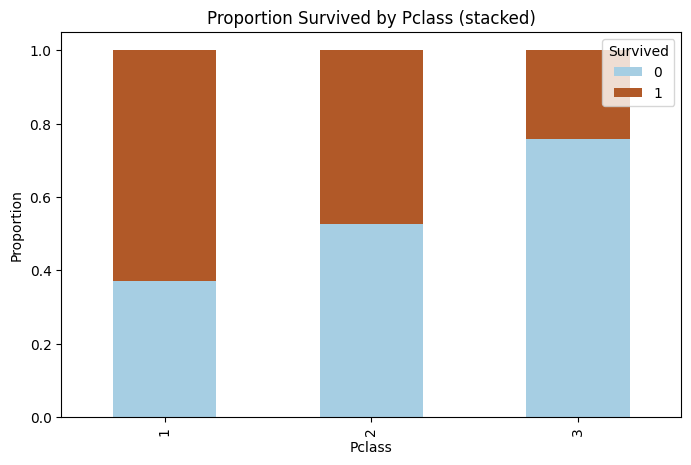

### Short summary

- Top predictive signals visible: Sex, Pclass, Fare (and Age after imputation).
- Next suggestions: impute Age, encode categorical vars, create title/party-size features, and try an initial classifier.

Done: visualizations generated in cell 2.


In [3]:

# Visual Exploratory Data Analysis (starts here in cell 2)
# The cell is robust: if `df` is not present from cell 1, it will load the CSV itself.
try:
    df
except NameError:
    import pandas as pd
    from pathlib import Path
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(style='whitegrid')
    path = Path(r'C:\Users\user\Documents\GitHub\notebooks-on-ml\TITANIC\DATA\train.csv')
    df = pd.read_csv(path)
    print('Loaded dataset in cell 2 from', path)

# Small helper to show sections clearly
from IPython.display import display, Markdown

def section(title):
    display(Markdown('### ' + title))

# 1) Quick overview
section('Quick overview')
print('Shape:', df.shape)
print('\nColumns and dtypes:')
print(df.dtypes)
print('\nMissing values per column:')
print(df.isna().sum())

# 2) Categorical counts & survival rates
section('Categorical counts & survival rates')
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.countplot(data=df, x='Survived')
plt.title('Count of Survival (0 = No, 1 = Yes)')

plt.subplot(2,3,2)
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Sex')

plt.subplot(2,3,3)
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Pclass')

plt.subplot(2,3,4)
sns.countplot(data=df, x='Pclass')
plt.title('Count by Pclass')

plt.subplot(2,3,5)
# Some Embarked values may be NaN; keep dropna=False to show counts
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Embarked')

plt.subplot(2,3,6)
sns.countplot(data=df, x='Embarked')
plt.title('Count by Embarked')

plt.tight_layout()
plt.show()

display(Markdown("**Interpretation:** Females generally have higher survival; higher classes (1) show higher survival rates. `Embarked` differences may reflect class composition."))

# 3) Numeric distributions: Age & Fare
section('Numeric distributions: Age & Fare')
plt.figure(figsize=(12,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age distribution (all passengers)')
plt.show()

plt.figure(figsize=(12,4))
sns.kdeplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age distribution by Survival (stacked KDE)')
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(df['Fare'].dropna(), bins=40, kde=True)
plt.title('Fare distribution (right-skewed)')
plt.show()

display(Markdown("**Notes:** `Age` has missing values; `Fare` is right-skewed (log transform may help)."))

# 4) Distribution comparisons (box/violin)
section('Box & Violin comparisons')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Pclass')

plt.subplot(1,2,2)
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age distribution by Survival')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare by Pclass and Survival')
plt.legend(title='Survived')
plt.show()

# 5) Correlation heatmap & pairplot (sampled)
section('Correlation & pairwise relationships')
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix (selected numeric columns)')
plt.show()

pair_sample = df[num_cols].dropna()
if len(pair_sample) > 400:
    pair_sample = pair_sample.sample(frac=0.4, random_state=1)

sns.pairplot(pair_sample, hue='Survived', diag_kind='kde', corner=True)
plt.suptitle('Pairplot (sampled) of numeric features', y=1.02)
plt.show()

# 6) Missingness and stacked proportions
section('Missingness and stacked proportions')
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values (True = NaN)')
plt.show()

ct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index')
ax = ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Paired')
ax.set_ylabel('Proportion')
ax.set_title('Proportion Survived by Pclass (stacked)')
plt.legend(title='Survived')
plt.show()

# Final brief summary printed
section('Short summary')
print('- Top predictive signals visible: Sex, Pclass, Fare (and Age after imputation).')
print("- Next suggestions: impute Age, encode categorical vars, create title/party-size features, and try an initial classifier.")

print('\nDone: visualizations generated in cell 2.')